In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
d_f = pd.read_csv('Book-01.csv')

In [3]:
df = d_f[['Job Level','Gender','Distance From Home','Years At Company',]]

In [4]:
X = df[['Job Level','Gender','Distance From Home','Years At Company',]]

In [5]:
X.head()

,Job Level,Gender,Distance From Home,Years At Company
0,2,Female,1,6
1,2,Male,8,10
2,1,Male,2,0
3,1,Female,3,8
4,1,Male,2,2


In [6]:
from sklearn.preprocessing import LabelEncoder
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])

In [7]:
X.head()

,Job Level,Gender,Distance From Home,Years At Company
0,2,0,1,6
1,2,1,8,10
2,1,1,2,0
3,1,0,3,8
4,1,1,2,2


In [8]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 4  # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X)

In [9]:
df['cluster'] = agg_labels

C:\Users\Bilawal\AppData\Local\Temp\ipykernel_15792\2109759614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = agg_labels


In [10]:
df.head()

,Job Level,Gender,Distance From Home,Years At Company,cluster
0,2,Female,1,6,3
1,2,Male,8,10,0
2,1,Male,2,0,3
3,1,Female,3,8,3
4,1,Male,2,2,3


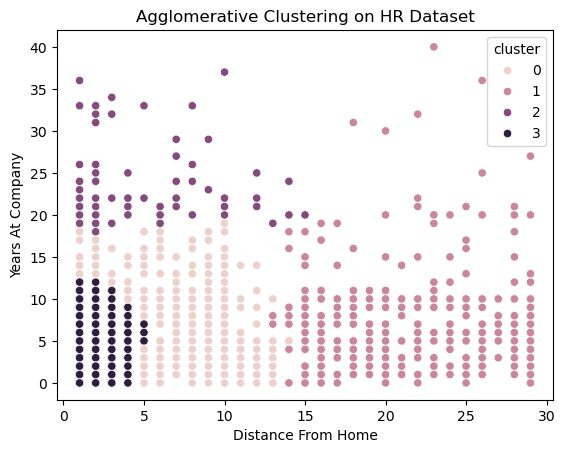

In [11]:
# Visualize the clusters
sns.scatterplot(data=df, x='Distance From Home', y='Years At Company', hue='cluster')
plt.title('Agglomerative Clustering on HR Dataset')
plt.xlabel('Distance From Home')
plt.ylabel('Years At Company')
plt.show()

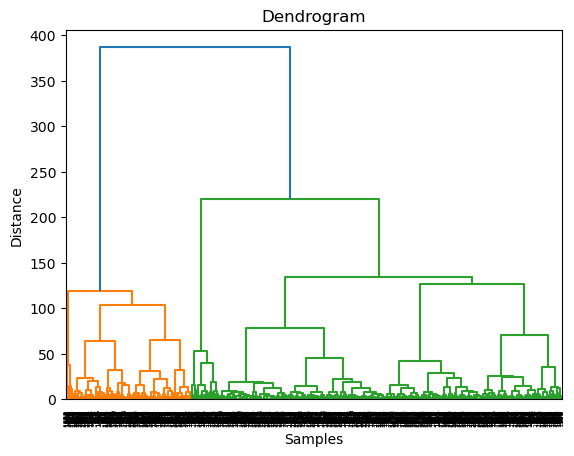

In [12]:
# Plot the dendrogram
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

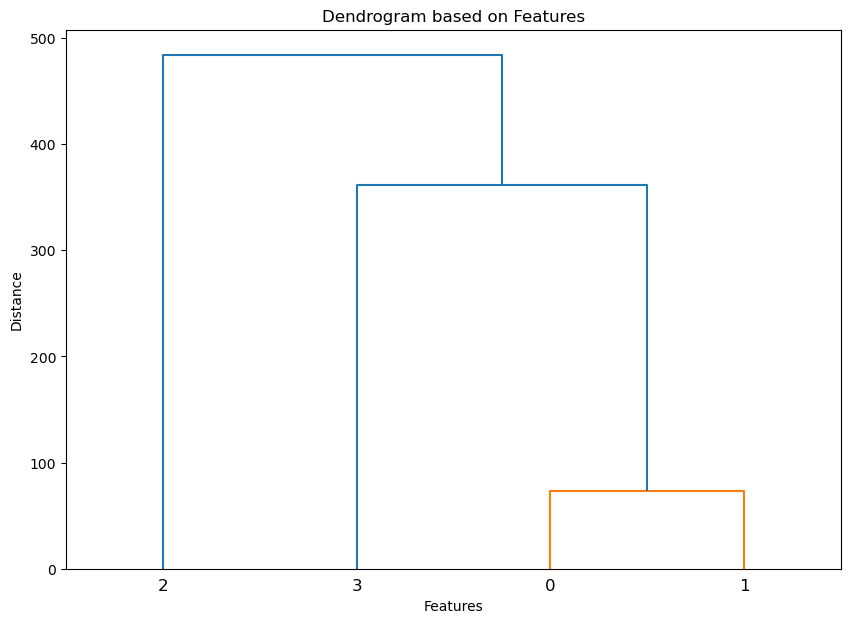

In [13]:
# Transpose the data matrix
X_transposed = X.transpose()

# Compute the linkage matrix
linkage_matrix = linkage(X_transposed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram based on Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [14]:
df['cluster'].value_counts()

cluster
0    520
3    497
1    372
2     81
Name: count, dtype: int64